#### Análise Exploratória de Dados

#### Neste notebook usaremos uma pesquisa recente nos EUA sobre o mercado de trabalho para programadores de software. Nosso objetivo é fazer uma investigação inicial dos dados a fim de detectar problemas com os dados, necessidade de mais variáveis, falhas na organização e necessidades de transformação.

#### Pesquisa Salarial realizada pelo site https://www.freecodecamp.com com programadores de software nos EUA que frequentaram treinamentos Bootcamp.

In [1]:
# Importar bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
import colorsys
import warnings

In [2]:
# Configurações adicionais
warnings.filterwarnings("ignore")
plt.style.use('seaborn-talk')
%matplotlib inline

In [3]:
# Carregar a base de dados (dataset)
pesquisa_df = pd.read_csv("Dados-Pesquisa.csv", sep = ',', low_memory = False)
# Examinar a base de dados
linhas, colunas = pesquisa_df.shape # Extrair tamanho da base de dados
print('A base de dados carregada possui {} linhas e {} colunas.'.format(linhas, colunas)) # Apresentar informação ao usuário
# display(pesquisa_df) # Apresentar ao usuário

A base de dados carregada possui 15620 linhas e 113 colunas.


#### Distribuição de Idade

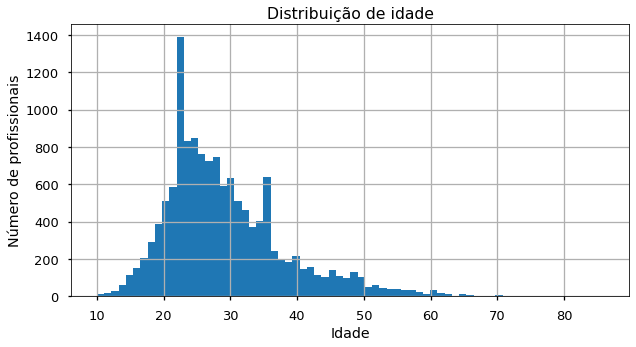

In [4]:
# Qual a distribuição de idade dos participantes da pesquisa?
# A maioria dos profissionais que trabalham como programadores de software
# estão na faixa de idade entre 20 e 30 anos, sendo 25 anos a idade mais frequente.

# Gerar um histograma a partir do atributo Age (Idade)
pesquisa_df.Age.hist(bins = 70, figsize = (10, 5))
plt.xlabel("Idade")
plt.ylabel("Número de profissionais")
plt.title("Distribuição de idade")
plt.show()

#### Distribuição de Gênero

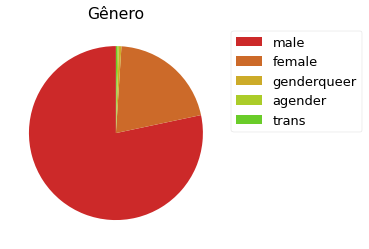

In [5]:
# Qual é a distribuição de sexo dos participantes da pesquisa?
# A grande maioria dos programadores é do sexo masculino.

# Definir a quantidade
labels = pesquisa_df.Gender.value_counts().index
num = len(pesquisa_df.EmploymentField.value_counts().index)

# Criar listas de cores
listaHSV = [(x*1.0/num, 0.8, 0.8) for x in range(num)]
listaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listaHSV))

# Criar gráfico de pizza
fatias, texto = plt.pie(pesquisa_df.Gender.value_counts(), colors = listaRGB, startangle = 90)
plt.legend(fatias, labels, bbox_to_anchor = (1.0,1.0))
plt.title("Gênero")
plt.show()

#### Distribuição de Interesses

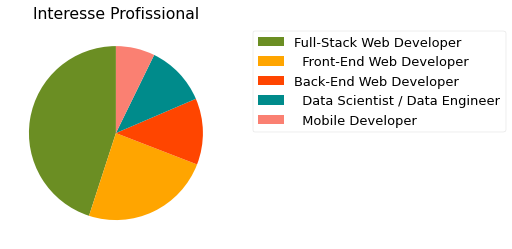

In [6]:
# Quais sãos os 5 principais interesses dos participantes da pesquisa?
# O principal interesse profissional dos programadores é o desenvolvimento web (Full-Stack, Front-End e Back-End), 
# seguido pela área de Data Science e desenvolvimento de aplicativos para dispositivos móveis (Mobile).

# Definir a quantidade
num = len(pesquisa_df.JobRoleInterest.value_counts()[0:5].index)

# Criar listas de cores
listaHSV = [(x*1.0/num, 0.8, 0.8) for x in range(num)]
listaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listaHSV))
labels = pesquisa_df.JobRoleInterest.value_counts()[0:5].index
colors = ['OliveDrab', 'Orange', 'OrangeRed', 'DarkCyan', 'Salmon', 'Sienna', 'Maroon', 'LightSlateGrey', 'DimGray']

# Criar gráfico de pizza
fatias, texto = plt.pie(pesquisa_df.JobRoleInterest.value_counts()[0:5], colors = colors, startangle = 90)
plt.legend(fatias, labels, bbox_to_anchor = (1.1, 1))
plt.title("Interesse Profissional")
plt.show()

#### Distribuição de Empregabilidade

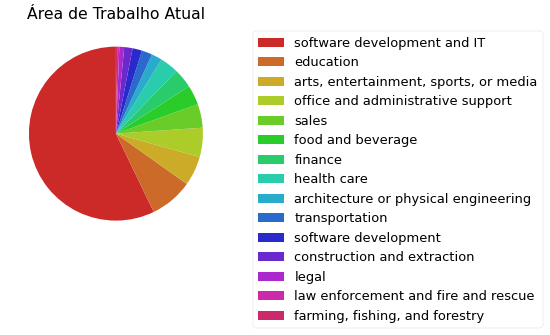

In [7]:
# Quais as áreas de negócio em que os participantes da pesquisa trabalham?
# A maioria dos programadores trabalha na área de desenvolvimento de 
# softwares e TI, mas outras áreas como finanças e saúde também são 
# significativas.

# Definir a quantidade
num = len(pesquisa_df.EmploymentField.value_counts().index)

# Criar listas de cores
listaHSV = [(x*1.0/num, 0.8, 0.8) for x in range(num)]
listaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listaHSV))
labels = pesquisa_df.EmploymentField.value_counts().index

# Criar gráfico de pizza
fatias, texto = plt.pie(pesquisa_df.EmploymentField.value_counts(), colors = listaRGB, startangle = 90)
plt.legend(fatias, labels, bbox_to_anchor = (1.1, 1.0))
plt.title("Área de Trabalho Atual")
plt.show()

#### Preferências de Trabalho por Idade

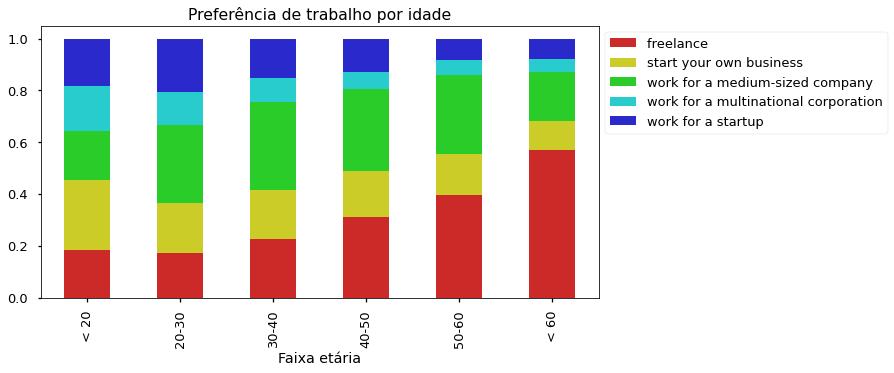

In [8]:
# Quais são as preferências de trabalho por idade?
# Perceba que à medida que a idade aumenta, o interesse por trabalho 
# freelance também aumenta, sendo o modelo preferido por profissionais 
# acima de 60 anos. Profissionais mais jovens preferem trabalhar em 
# Startups ou no seu próprio negócio. Profissionais entre 20 e 50 anos 
# preferem trabalhar em empresas de tamanho médio.

# Agrupar os dados
ageranges_df = pesquisa_df.copy() # Copiar o dataframe existente
bins = [0, 20, 30, 40, 50, 60, 100]

ageranges_df['AgeRanges'] = pd.cut(ageranges_df['Age'], bins, labels = ["< 20", "20-30", "30-40", "40-50", "50-60", "< 60"]) 

resultado_df = pd.crosstab(ageranges_df.AgeRanges, ageranges_df.JobPref).apply(lambda r: r/r.sum(), axis = 1)

# Visualizar o help
# help(pd.crosstab)

# Definir a quantidade
num = len(ageranges_df.AgeRanges.value_counts().index)

# Criar listas de cores
listaHSV = [(x*1.0/num, 0.8, 0.8) for x in range(num)]
listaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listaHSV))

# Criar gráfico de barras (stacked - empilhado)
ax = resultado_df.plot(kind = "bar", stacked = True, color = listaRGB, title = "Preferência de trabalho por idade",
                       figsize = (10, 5), xlabel = "Faixa etária")
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, bbox_to_anchor = (1.0, 1.0));

In [9]:
# Transformar os valores em percentuais com duas casas decimais
a = resultado_df["freelance "].apply(lambda x: f'{x:.2%}')
b = resultado_df["start your own business"].apply(lambda x: f'{x:.2%}')
c = resultado_df["work for a medium-sized company"].apply(lambda x: f'{x:.2%}')
d = resultado_df["work for a multinational corporation"].apply(lambda x: f'{x:.2%}')
e = resultado_df["work for a startup"].apply(lambda x: f'{x:.2%}')

# f = pd.DataFrame.from_records(data = [a, b, c, d, e])
# f = f.transpose() # Transpor linhas e colunas

f = pd.DataFrame({"freelance": a, "start your own business": b, "work for a medium-sized company": c,
                  "work for a multinational corporation": d, "work for a startup": e}) # Criar dataframe
display(f) # Apresentar ao usuário

,freelance,start your own business,work for a medium-sized company,work for a multinational corporation,work for a startup
AgeRanges,,,,,
< 20,18.46%,26.86%,19.03%,17.57%,18.08%
20-30,17.37%,19.04%,30.20%,12.72%,20.68%
30-40,22.53%,19.10%,33.95%,9.31%,15.11%
40-50,31.26%,17.65%,31.60%,6.46%,13.03%
50-60,39.45%,16.02%,30.47%,5.86%,8.20%
< 60,57.14%,11.11%,19.05%,4.76%,7.94%


#### Realocação por Idade

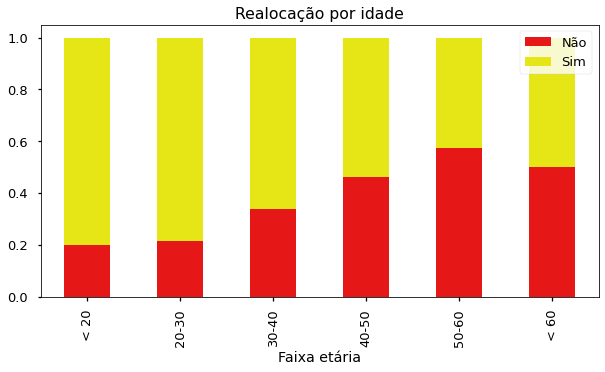

In [10]:
# Qual o objetivo de realocação?
# A vontade de buscar um novo emprego diminui com a idade.
# Na faixa etária de de 40 a 50 anos é mais que o dobro a não procura por realocação.
# Aproximadamente 50% das pessoas acima de 50 anos não tem vontade de realocação.
# Quase 80% das pessoas abaixo dos 30 anos estão preparadas para isso.

# Agrupar os dados
resultado_df = pd.crosstab(ageranges_df.AgeRanges, 
                  ageranges_df.JobRelocateYesNo).apply(lambda r: r/r.sum(), axis = 1)

# Definir a quantidade
num = len(ageranges_df.AgeRanges.value_counts().index)

# Criar listas de cores
listaHSV = [(x*1.0/num, 0.9, 0.9) for x in range(num)]
listaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listaHSV))

# Criar gráfico de barras (stacked - empilhado)
ax = resultado_df.plot(kind = "bar", stacked = True, color = listaRGB, title = "Realocação por idade",
                       figsize = (10, 5), xlabel = "Faixa etária")
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, ["Não", "Sim"], loc = 'best');

#### Idade vs. Horas de Aprendizagem

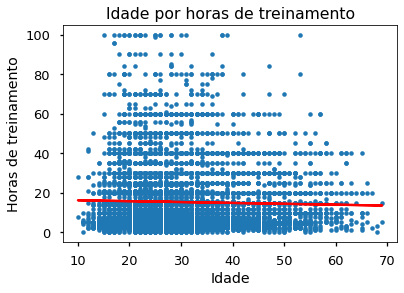

In [11]:
# Qual a relação entre idade e horas de aprendizagem?
# A idade dos profissionais praticamente não afeta a quantidade de tempo investido em capacitação e treinamento.

import warnings
warnings.filterwarnings('ignore')

# Criar subset dos dados
resultado_df = pesquisa_df.copy()
resultado_df = resultado_df.dropna(subset = ["HoursLearning"])
resultado_df = resultado_df[pesquisa_df['Age'].isin(range(0,70))]

# Definir os valores de x e y
x = resultado_df.Age
y = resultado_df.HoursLearning

# Computar os valores e gerar gráfico
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-', color = "red")
plt.xlabel("Idade")
plt.ylabel("Horas de treinamento")
plt.title("Idade por horas de treinamento")
plt.show()

#### Investimento em Capacitação vs. Expectativa Salarial

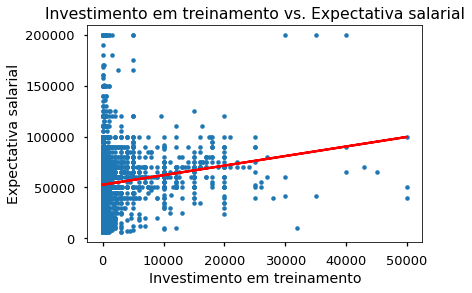

In [12]:
# Qual a relação entre investimento em capacitação e expectativa salarial?
# Os profissionais que investem tempo e dinheiro em capacitação e 
# treinamento, em geral, conseguem salários mais altos, embora alguns 
# profisisonais esperem altos salários, investindo nada em treinamento.

import warnings
warnings.filterwarnings('ignore')

# Criar subset dos dados
resultado_df = pesquisa_df.copy()
resultado_df = resultado_df.dropna(subset = ["ExpectedEarning"])
resultado_df = resultado_df[pesquisa_df['MoneyForLearning'].isin(range(0,60000))]

# Definir os valores de x e y
x = resultado_df.MoneyForLearning
y = resultado_df.ExpectedEarning

# Computar os valores e gerar gráfico
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-', color = "red")
plt.xlabel("Investimento em treinamento")
plt.ylabel("Expectativa salarial")
plt.title("Investimento em treinamento vs. Expectativa salarial")
plt.show()

In [92]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


#### Nível de Escolaridade dos Participantes

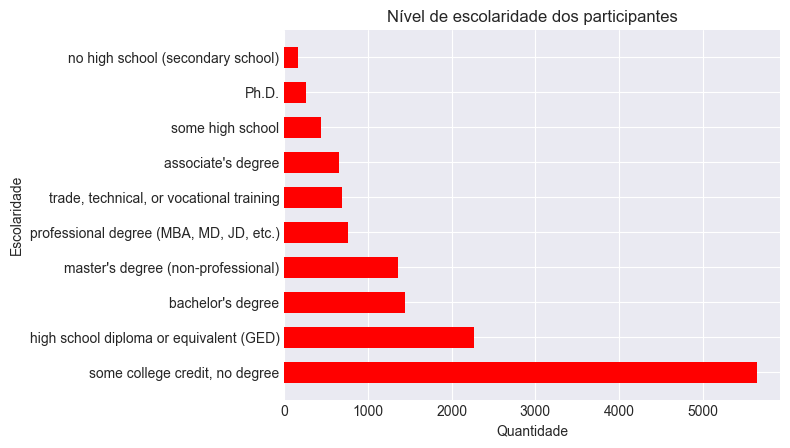

In [97]:
# Selecionar dados a serem visualizados
x = pesquisa_df.SchoolDegree.dropna()
x = x.unique()
x = list(x)
y = pesquisa_df.SchoolDegree.value_counts()

# Criar gráfico de barra horizontal
# plt.style.use('default')
plt.style.use('seaborn-darkgrid')
plt.barh(x, y, height = 0.6, color = "red")
plt.xlabel("Quantidade")
plt.ylabel("Escolaridade")
plt.title("Nível de escolaridade dos participantes")
plt.show()

# Percebe-se que a maioria esmagadora dos participantes não possui alta escolaridade, sendo composto por pessoas
# com ensino médio incompleto e completo e graduação. 

#### Status de Ocupação dos Participantes

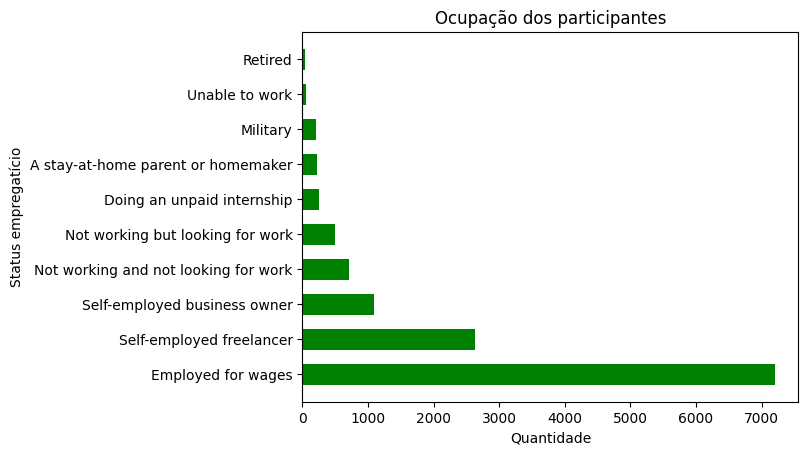

In [119]:
# Selecionar dados a serem visualizados
x = pesquisa_df.EmploymentStatus.dropna()
x = x.unique()
x = list(x)
y = pesquisa_df.EmploymentStatus.value_counts()

# Criar gráfico de barra horizontal
plt.style.use('default')
# plt.style.use('bmh')
plt.barh(x, y, height = 0.6, color = "green")
plt.xlabel("Quantidade")
plt.ylabel("Status empregatício")
plt.title("Ocupação dos participantes")
plt.show()

# Percebe-se que a grande maioria dos participantes da pesquisa ou é trabalhador com vínculo empregatício ou autônomo.

In [102]:
print(pesquisa_df.columns.to_list()) # Lista de todas as colunas presentes na base de dados estudada

['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampFullJobAfter', 'BootcampLoanYesNo', 'BootcampMonthsAgo', 'BootcampName', 'BootcampPostSalary', 'BootcampRecommend', 'ChildrenNumber', 'CityPopulation', 'CodeEventBootcamp', 'CodeEventCoffee', 'CodeEventConferences', 'CodeEventDjangoGirls', 'CodeEventGameJam', 'CodeEventGirlDev', 'CodeEventHackathons', 'CodeEventMeetup', 'CodeEventNodeSchool', 'CodeEventNone', 'CodeEventOther', 'CodeEventRailsBridge', 'CodeEventRailsGirls', 'CodeEventStartUpWknd', 'CodeEventWomenCode', 'CodeEventWorkshop', 'CommuteTime', 'CountryCitizen', 'CountryLive', 'EmploymentField', 'EmploymentFieldOther', 'EmploymentStatus', 'EmploymentStatusOther', 'ExpectedEarning', 'FinanciallySupporting', 'Gender', 'HasChildren', 'HasDebt', 'HasFinancialDependents', 'HasHighSpdInternet', 'HasHomeMortgage', 'HasServedInMilitary', 'HasStudentDebt', 'HomeMortgageOwe', 'HoursLearning', 'ID.x', 'ID.y', 'Income', 'IsEthnicMinority', 'IsReceiveDiabilitiesBenefits', 'IsSoftwareDe

#### Fim da Rotina